In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import re
# import nltk
from sklearn.model_selection import train_test_split
# from nltk.corpus import stopwords
import joblib
import stopwordsiso as stopwords


In [2]:
df = pd.read_csv('../dataset/tagged.csv',  delimiter=',', quoting=2, encoding="utf-8")

In [3]:
df.head(5)

,sentences,sentiment_tag
0,Enjoying a beautiful day at the park! ...,2.0
1,Traffic was terrible this morning. ...,1.0
2,Just finished an amazing workout! 💪 ...,2.0
3,Excited about the upcoming weekend getaway! ...,2.0
4,Trying out a new recipe for dinner tonight. ...,0.0


In [4]:
stpwrd = stopwords.stopwords("en")

In [5]:
def procces_sentence(review:str)->str:
    sample_review = re.sub(r'http\S+', '', review)
    sample_review = re.sub("[^a-zA-Z]",' ',sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    # swords = set(stopwords.words("english"))      
    swords = set(stpwrd)                                    
    sample_review = [w for w in sample_review if w not in swords and len(w) > 1]
    sample_review = " ".join(sample_review)
    return sample_review

def take_res(count:int)->int:
    # sub = df["Subjectivity"][count]
    pol = df["sentiment_tag"][count]
    return pol
    
    


In [6]:
from tqdm import tqdm

count_t = 219288

trainx = []
trainy = []
for i in tqdm(range(0,len(df["sentences"]))):
    trainx.append(procces_sentence(df["sentences"][i]))
    trainy.append(take_res(i))



100%|██████████| 50732/50732 [00:05<00:00, 9514.82it/s]


In [7]:
trainy = np.array(trainy)
train_x, test_x, y_train, y_test = train_test_split(trainx,trainy, test_size = 0.1)
vectorizer = CountVectorizer( max_features = 15000 )
train_x = vectorizer.fit_transform(train_x)



In [43]:
joblib.dump(vectorizer, "models/vectorizer.pkl")

['models/vectorizer.pkl']

In [8]:
test_xx = vectorizer.transform(test_x)
test_xx
test_xx = test_xx.toarray()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import joblib

# Sınıflandırma modelleri
models = {
    'Logistic Regressor': LogisticRegression(max_iter=1000),
    'Random Forest Classifier': RandomForestClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'CatBoost Classifier': CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, verbose=0),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results_classification = {}

# Eğitim ve test
for name, model in models.items():
    model.fit(train_x, y_train)  # Y_train bir tek boyutlu sınıf etiketi vektörü olmalıdır
    y_pred = model.predict(test_xx)
    acc = accuracy_score(y_test, y_pred)
    results_classification[name] = {'Accuracy': acc}
    joblib.dump(model, f"models/{name}.pkl")
    print(f'{name}: Accuracy = {acc}')




Logistic Regressor: Accuracy = 0.8772171856523453
Random Forest Classifier: Accuracy = 0.8458809617658652
Extra Trees Classifier: Accuracy = 0.8697280252266456
AdaBoost Classifier: Accuracy = 0.6344107213243989
Decision Tree Classifier: Accuracy = 0.7240835632636973
K Neighbors Classifier: Accuracy = 0.5567599527000394
CatBoost Classifier: Accuracy = 0.8555380370516358


f:\code\My GitHub\sentence-analysis-updated\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier: Accuracy = 0.4826566811194324


In [21]:
# Sonuçları DataFrame'e dönüştürme
results_classification_df = pd.DataFrame(results_classification).T

print("Classification Results:")
print(results_classification_df)

Classification Results:
                          Accuracy
Logistic Regressor        0.877217
Random Forest Classifier  0.845881
Extra Trees Classifier    0.869728
AdaBoost Classifier       0.634411
Decision Tree Classifier  0.724084
K Neighbors Classifier    0.556760
CatBoost Classifier       0.855538
XGBoost Classifier        0.482657


In [15]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(train_x, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

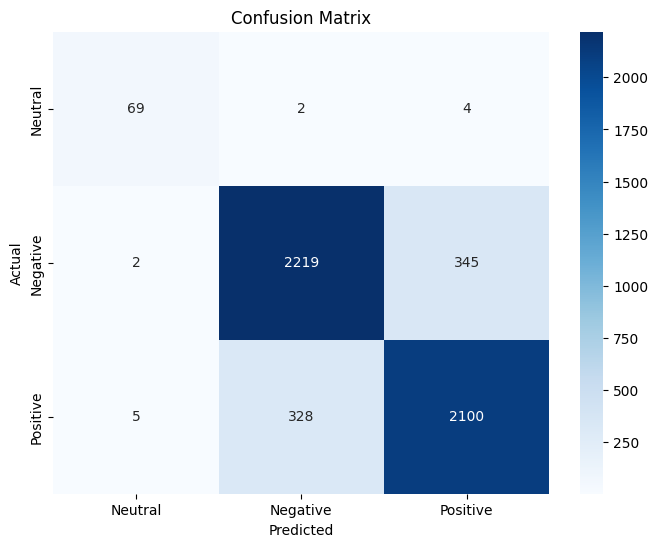

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the test set
y_pred = model.predict(test_xx)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
m = models['CatBoost Classifier']
def predict_sentiment(sentence: str, model):
    processed_sentence = procces_sentence(sentence)
    vectorized_sentence = vectorizer.transform([processed_sentence]).toarray()
    prediction = model.predict(vectorized_sentence)
    probabilities = model.predict_proba(vectorized_sentence)
    
    sentiment_map = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}

    if name == 'CatBoost Classifier':
        predicted_class = int(prediction[0][0])
    else:
        predicted_class = prediction[0]

    
    print(f"Predicted Sentiment: {predicted_sentiment}")
    max_probability = max(probabilities[0]) * 100
    print(f"Max Probability: {max_probability:.2f}%")

# Example usage
new_sentence = "I had a wonderful experience at the park!"
predict_sentiment(new_sentence, m)


Predicted Sentiment: Neutral
Max Probability: 59.29%


In [34]:
sentence = "I had a wonderful experience at the park!"

for name, model in models.items():

    print("Model: ", name)
    predict_sentiment(new_sentence, model)
    print("\n")
    


Model:  Logistic Regressor
Predicted Sentiment: Neutral
Max Probability: 52.55%


Model:  Random Forest Classifier
Predicted Sentiment: Neutral
Max Probability: 81.00%


Model:  Extra Trees Classifier
Predicted Sentiment: Neutral
Max Probability: 78.00%


Model:  AdaBoost Classifier
Predicted Sentiment: Neutral
Max Probability: 34.36%


Model:  Decision Tree Classifier
Predicted Sentiment: Neutral
Max Probability: 100.00%


Model:  K Neighbors Classifier
Predicted Sentiment: Neutral
Max Probability: 60.00%


Model:  CatBoost Classifier
Predicted Sentiment: Neutral
Max Probability: 59.29%


Model:  XGBoost Classifier
Predicted Sentiment: Neutral
Max Probability: 94.07%


